In [12]:
import sys
import os

In [ ]:
#sys.path.append(os.path.abspath(os.path.join('..')))

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# File paths
file_paths = {
    "AAPL": "../data/AAPL_historical_data.csv",
    "AMZN": "../data/AMZN_historical_data.csv",
    "GOOG": "../data/GOOG_historical_data.csv",
    "META": "../data/META_historical_data.csv",
    "MSFT": "../data/MSFT_historical_data.csv",
    "NVDA": "../data/NVDA_historical_data.csv",
    "TSLA": "../data/TSLA_historical_data.csv"
}

In [16]:
# Load all stock datasets
stock_data = {}
for ticker, path in file_paths.items():
    df = pd.read_csv(path, parse_dates=['Date'])
    df.sort_values('Date', inplace=True)
    df.set_index('Date', inplace=True)
    stock_data[ticker] = df

In [17]:
# Show a sample
stock_data['AAPL'].head()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0


In [ ]:
# Load the news data
news_df = pd.read_csv('../data/raw_analyst_ratings.csv')
news_df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [37]:
# Clean and pred the news data
news_df['date'] = pd.to_datetime(news_df['date'], format='mixed', errors='coerce', utc=True)
news_df['headline_length'] = news_df['headline'].str.len()
news_df.head()

# Check if 'date' column is actually a Date object
print(news_df['date'].dtype)

datetime64[ns, UTC]


In [38]:
# Drop rows with bad/missing dates
news_df.dropna(subset=['date'], inplace=True)
news_df.head()

,Unnamed: 0,headline,url,publisher,date,stock,headline_length,date_only,hour
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 14:30:54+00:00,A,39,2020-06-05,14
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 14:45:20+00:00,A,42,2020-06-03,14
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 08:30:07+00:00,A,29,2020-05-26,8
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 16:45:06+00:00,A,44,2020-05-22,16
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 15:38:59+00:00,A,87,2020-05-22,15


In [39]:
# Summary
news_df.info(), news_df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 9 columns):
 #   Column           Non-Null Count    Dtype              
---  ------           --------------    -----              
 0   Unnamed: 0       1407328 non-null  int64              
 1   headline         1407328 non-null  object             
 2   url              1407328 non-null  object             
 3   publisher        1407328 non-null  object             
 4   date             1407328 non-null  datetime64[ns, UTC]
 5   stock            1407328 non-null  object             
 6   headline_length  1407328 non-null  int64              
 7   date_only        1407328 non-null  object             
 8   hour             1407328 non-null  int32              
dtypes: datetime64[ns, UTC](1), int32(1), int64(2), object(5)
memory usage: 91.3+ MB


(None,
           Unnamed: 0                 headline  \
 count   1.407328e+06                  1407328   
 unique           NaN                   845770   
 top              NaN  Benzinga's Top Upgrades   
 freq             NaN                     5449   
 mean    7.072454e+05                      NaN   
 min     0.000000e+00                      NaN   
 25%     3.538128e+05                      NaN   
 50%     7.072395e+05                      NaN   
 75%     1.060710e+06                      NaN   
 max     1.413848e+06                      NaN   
 std     4.081009e+05                      NaN   
 
                                                       url      publisher  \
 count                                             1407328        1407328   
 unique                                             883429           1034   
 top     https://www.benzinga.com/news/20/03/15538835/s...  Paul Quintaro   
 freq                                                 1704         228373   
 mean 

In [41]:
# Add Date and Hour only columns
news_df['date_only'] = news_df['date'].dt.date
news_df['hour'] = news_df['date'].dt.hour
news_df.head()

,Unnamed: 0,headline,url,publisher,date,stock,headline_length,date_only,hour
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 14:30:54+00:00,A,39,2020-06-05,14
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 14:45:20+00:00,A,42,2020-06-03,14
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 08:30:07+00:00,A,29,2020-05-26,8
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 16:45:06+00:00,A,44,2020-05-22,16
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 15:38:59+00:00,A,87,2020-05-22,15



📊 Headline Length Statistics:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


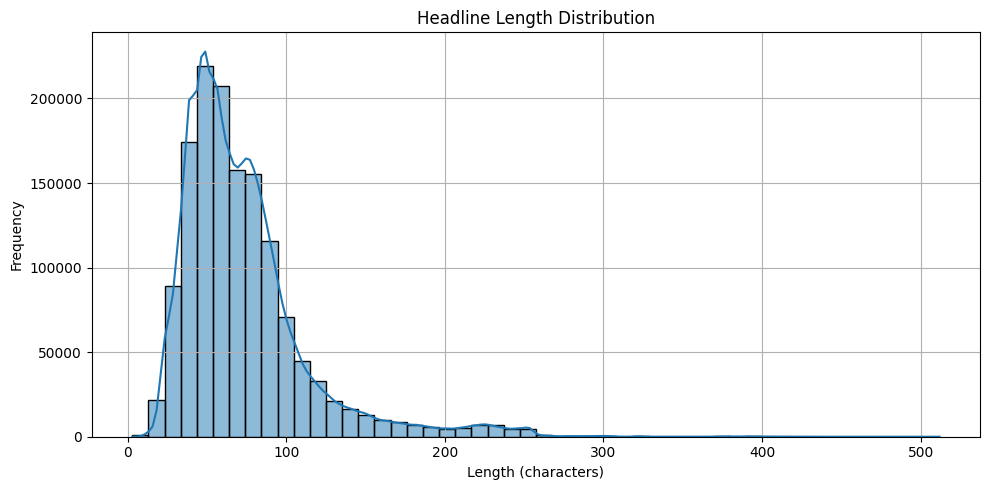

In [46]:
# Headline Length Stats
print("\n📊 Headline Length Statistics:")
print(news_df['headline_length'].describe())

plt.figure(figsize=(10, 5))
sns.histplot(news_df['headline_length'], bins=50, kde=True)
plt.title("Headline Length Distribution")
plt.xlabel("Length (characters)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


📰 Top Publishers:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Vick Meyer            24826
webmaster             20313
Benzinga_Newsdesk     19410
Zacks                 19390
Jayson Derrick        19050
Name: count, dtype: int64


/var/folders/cg/vq8tmr4540d4j652btyymbt40000gn/T/ipykernel_95345/3612867795.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_publishers.values, y=top_publishers.index, palette="mako")


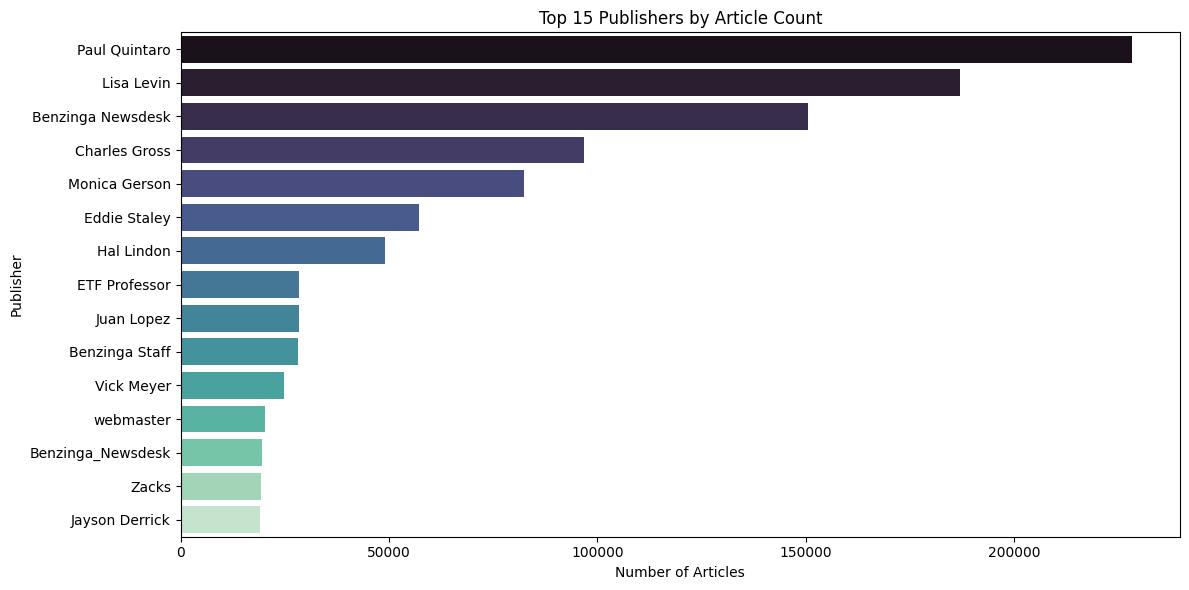

In [48]:
# Top Publishers
top_publishers = news_df['publisher'].value_counts().head(15)
print("\n📰 Top Publishers:")
print(top_publishers)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_publishers.values, y=top_publishers.index, palette="mako")
plt.title("Top 15 Publishers by Article Count")
plt.xlabel("Number of Articles")
plt.ylabel("Publisher")
plt.tight_layout()
plt.show()

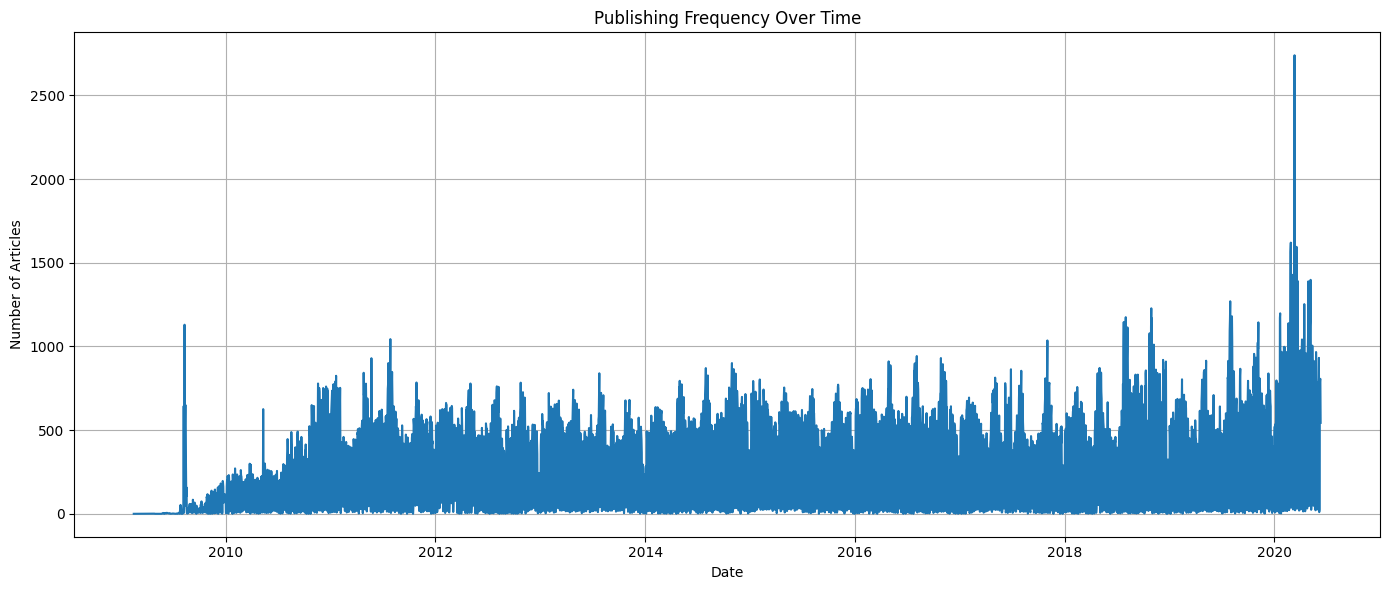

In [49]:
# Publishing Trend Over Time
daily_counts = news_df.groupby('date_only').size()

plt.figure(figsize=(14, 6))
daily_counts.plot()
plt.title("Publishing Frequency Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.grid(True)
plt.tight_layout()
plt.show()

/var/folders/cg/vq8tmr4540d4j652btyymbt40000gn/T/ipykernel_95345/897111190.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_counts.index, y=hourly_counts.values, palette="rocket")


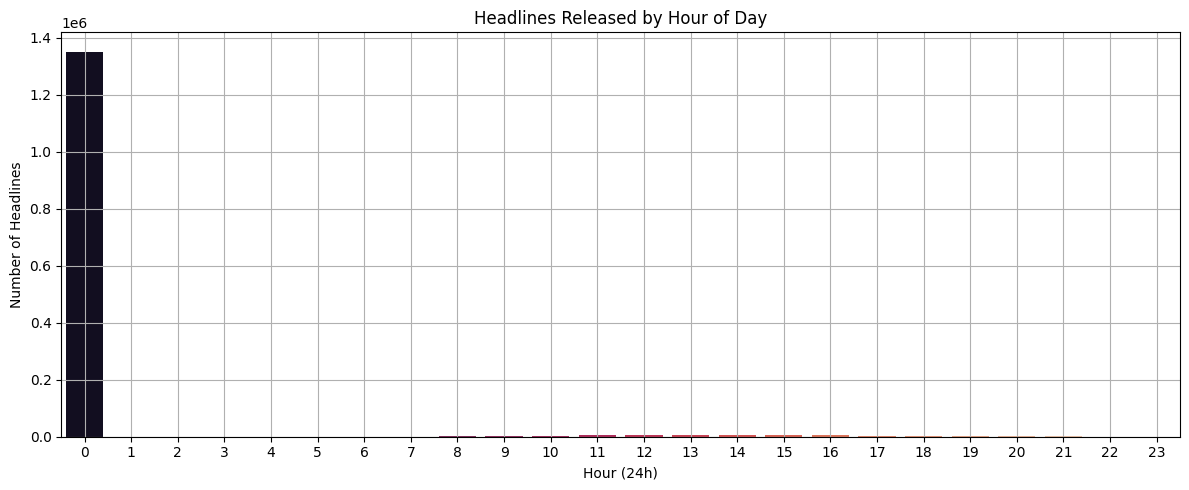

In [50]:
# Time of Day Analysis
hourly_counts = news_df['hour'].value_counts().sort_index()

plt.figure(figsize=(12, 5))
sns.barplot(x=hourly_counts.index, y=hourly_counts.values, palette="rocket")
plt.title("Headlines Released by Hour of Day")
plt.xlabel("Hour (24h)")
plt.ylabel("Number of Headlines")
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()


🧠 Top Keywords and Phrases:
vs           1217
stocks       1197
est          1059
eps           945
market        897
shares        827
reports       776
update        680
earnings      618
sales         578
pt            525
benzinga      518
mid           500
announces     493
week          492
price         484
buy           465
trading       441
upgrades      429
52            422
dtype: int64


/var/folders/cg/vq8tmr4540d4j652btyymbt40000gn/T/ipykernel_95345/116447945.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freq_series.values[:20],


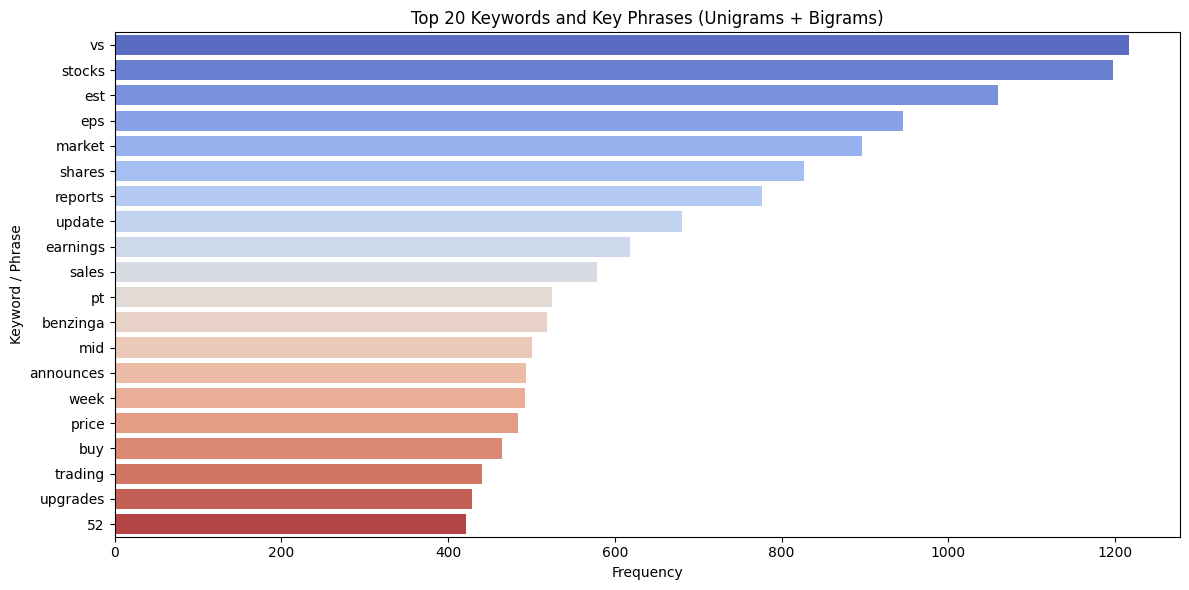

In [52]:
# Topic Modelling
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample for memory-efficiency
sample_headlines = news_df['headline'].dropna().sample(
    n=10000, random_state=42)

# Vectorize: Extract common unigrams + bigrams
vectorizer = CountVectorizer(
    stop_words='english', ngram_range=(1, 2), max_features=50)
X = vectorizer.fit_transform(sample_headlines)

# Sum frequencies
word_counts = X.toarray().sum(axis=0)
feature_names = vectorizer.get_feature_names_out()
freq_series = pd.Series(
    word_counts, index=feature_names).sort_values(ascending=False)

# Display Top Keywords/Phrases
print("\n🧠 Top Keywords and Phrases:")
print(freq_series.head(20))

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=freq_series.values[:20],
            y=freq_series.index[:20], palette="coolwarm")
plt.title("Top 20 Keywords and Key Phrases (Unigrams + Bigrams)")
plt.xlabel("Frequency")
plt.ylabel("Keyword / Phrase")
plt.tight_layout()
plt.show()

/var/folders/cg/vq8tmr4540d4j652btyymbt40000gn/T/ipykernel_95345/916393288.py:26: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/yosephabate/Documents/PERSONAL PROFESSIONAL/KIFIYA/WEEK 1/CHALLENGES/SOLUTION/GITHUB/financial-challenge-week/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


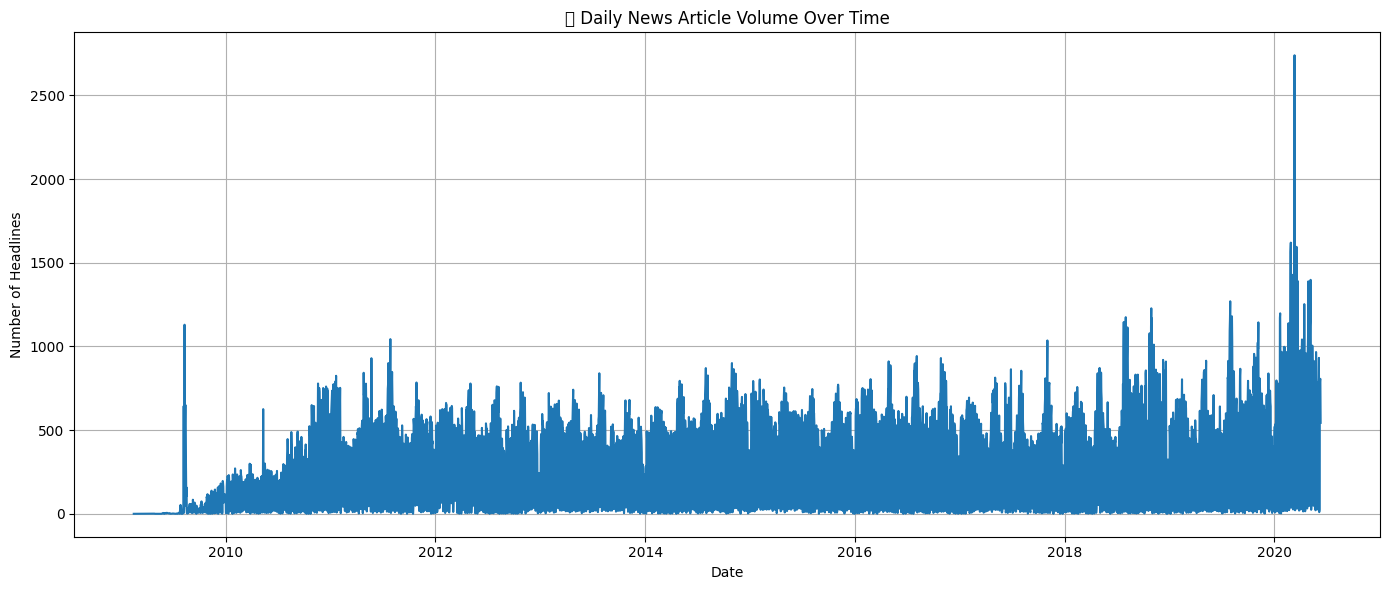

/var/folders/cg/vq8tmr4540d4j652btyymbt40000gn/T/ipykernel_95345/916393288.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_counts.index, y=hourly_counts.values, palette="flare")
/var/folders/cg/vq8tmr4540d4j652btyymbt40000gn/T/ipykernel_95345/916393288.py:41: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/yosephabate/Documents/PERSONAL PROFESSIONAL/KIFIYA/WEEK 1/CHALLENGES/SOLUTION/GITHUB/financial-challenge-week/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


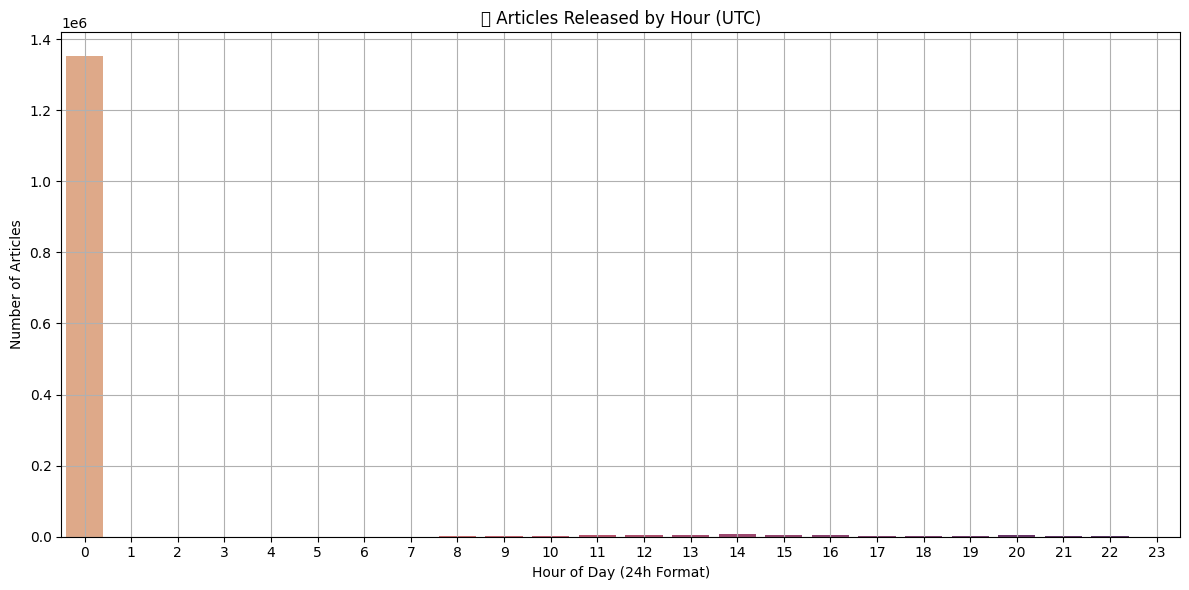

In [53]:
# Time Series Analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure datetime is parsed correctly
news_df['date'] = pd.to_datetime(
    news_df['date'], format='mixed', errors='coerce', utc=True)
news_df.dropna(subset=['date'], inplace=True)

# Add date-only and hour
news_df['date_only'] = news_df['date'].dt.date
news_df['hour'] = news_df['date'].dt.hour

# ------------------------------------
# 1. Publication Frequency Over Time
# ------------------------------------
daily_counts = news_df.groupby('date_only').size()

plt.figure(figsize=(14, 6))
daily_counts.plot()
plt.title("📅 Daily News Article Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Headlines")
plt.grid(True)
plt.tight_layout()
plt.show()

# ------------------------------------
# 2. Hourly Distribution of Headlines
# ------------------------------------
hourly_counts = news_df['hour'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_counts.index, y=hourly_counts.values, palette="flare")
plt.title("⏰ Articles Released by Hour (UTC)")
plt.xlabel("Hour of Day (24h Format)")
plt.ylabel("Number of Articles")
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

/var/folders/cg/vq8tmr4540d4j652btyymbt40000gn/T/ipykernel_95345/1272052073.py:13: UserWarning: Glyph 129440 (\N{MICROBE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/yosephabate/Documents/PERSONAL PROFESSIONAL/KIFIYA/WEEK 1/CHALLENGES/SOLUTION/GITHUB/financial-challenge-week/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129440 (\N{MICROBE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yosephabate/Documents/PERSONAL PROFESSIONAL/KIFIYA/WEEK 1/CHALLENGES/SOLUTION/GITHUB/financial-challenge-week/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129440 (\N{MICROBE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


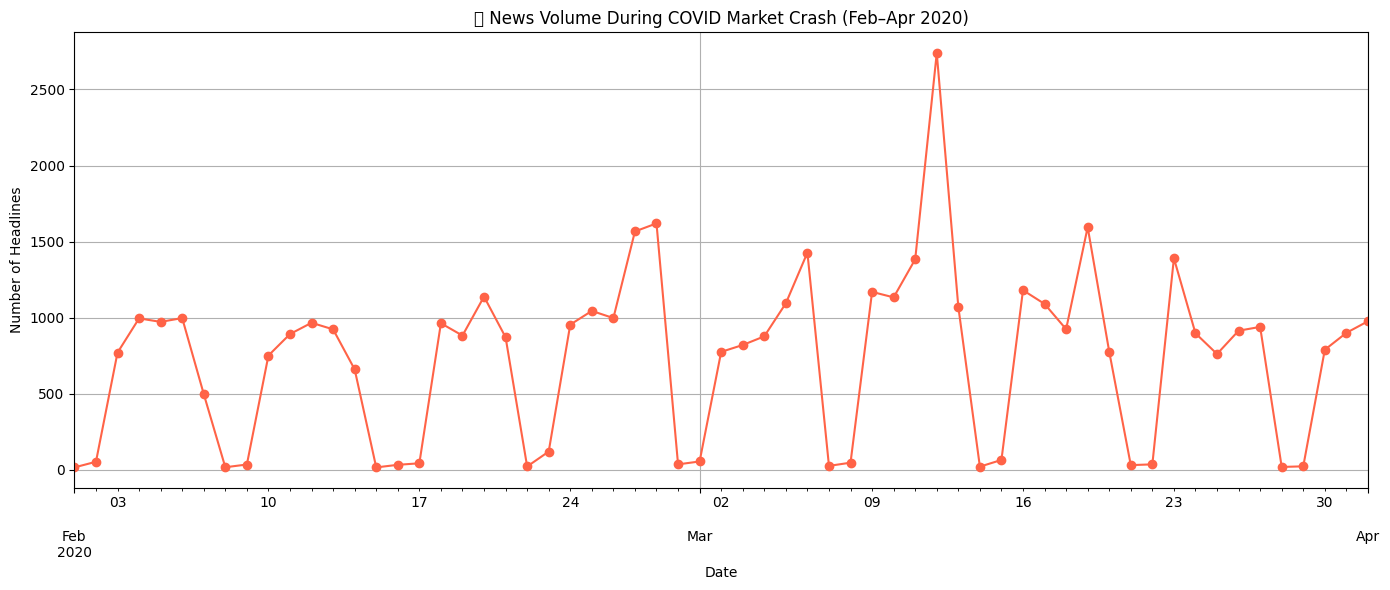

In [54]:
# Zoom to a specific volatile period - COVID

# Convert index to datetime to allow slicing
daily_counts.index = pd.to_datetime(daily_counts.index)

# Slice and plot
plt.figure(figsize=(14, 6))
daily_counts['2020-02-01':'2020-04-01'].plot(color='tomato', marker='o')
plt.title("🦠 News Volume During COVID Market Crash (Feb–Apr 2020)")
plt.xlabel("Date")
plt.ylabel("Number of Headlines")
plt.grid(True)
plt.tight_layout()
plt.show()


📰 Top 15 Publishers:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Vick Meyer            24826
webmaster             20313
Benzinga_Newsdesk     19410
Zacks                 19390
Jayson Derrick        19050
Name: count, dtype: int64


/var/folders/cg/vq8tmr4540d4j652btyymbt40000gn/T/ipykernel_95345/4209347343.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_publishers.values, y=top_publishers.index, palette="crest")


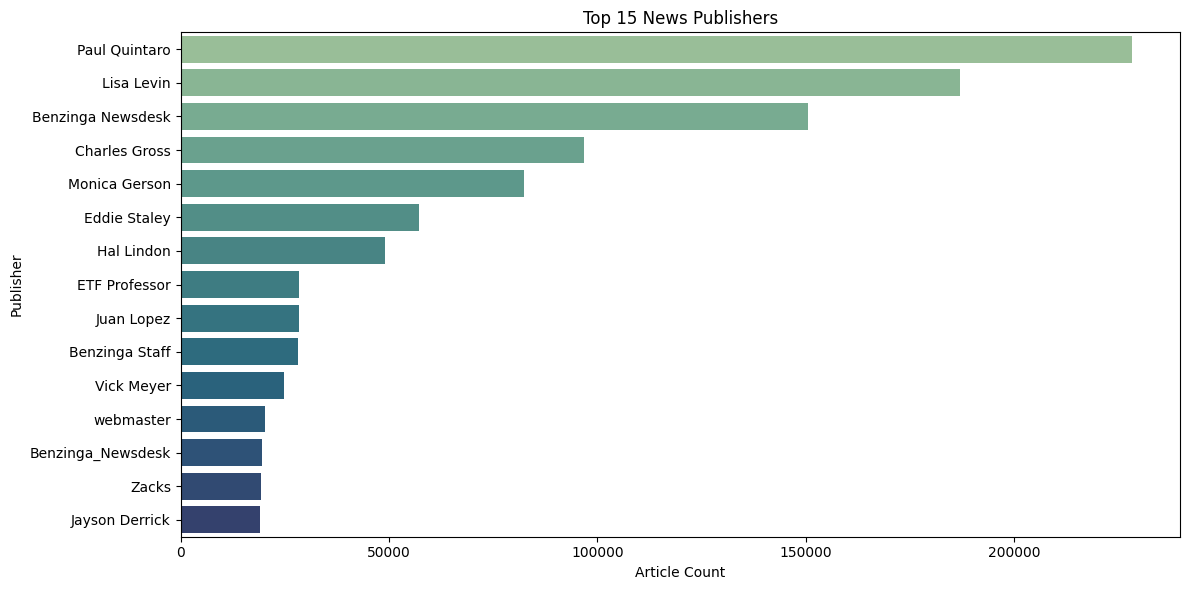


📌 Sample headlines from: Paul Quintaro
['China Green Agriculture Reports Signing of Tripartite Cooperation Memorandum with Business Strategy Partners', 'Capital One Financial Upgrades SM Energy Company Common Stock to Overweight', "Sweden's Reinfeldt Says Very Skeptical About Euro Bonds, Euro Region is Moving in the Right Direction", 'Deutsche Bank Initiates Coverage On National Oilwell Varco with Hold Rating, Announces $39.00 Price Target', 'American Eagle Outfitters, Inc. Sees Q1 EPS $0.00 vs $0.13 Est']

📌 Sample headlines from: Lisa Levin
['8 Stocks To Watch For December 5, 2017', 'A Peek Into The Market Before The Trading Starts', "42 Stocks Moving In Monday's Mid-Day Session", 'Stocks That Hit 52-Week Highs On Wednesday', '5 Healthcare Stocks With The Highest Operating Margin']

📌 Sample headlines from: Benzinga Newsdesk
['Shares of several iron ore companies are trading higher amid positive market sentiment as some US states and China begin easing lockdown restrictions. A soone

/var/folders/cg/vq8tmr4540d4j652btyymbt40000gn/T/ipykernel_95345/4209347343.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


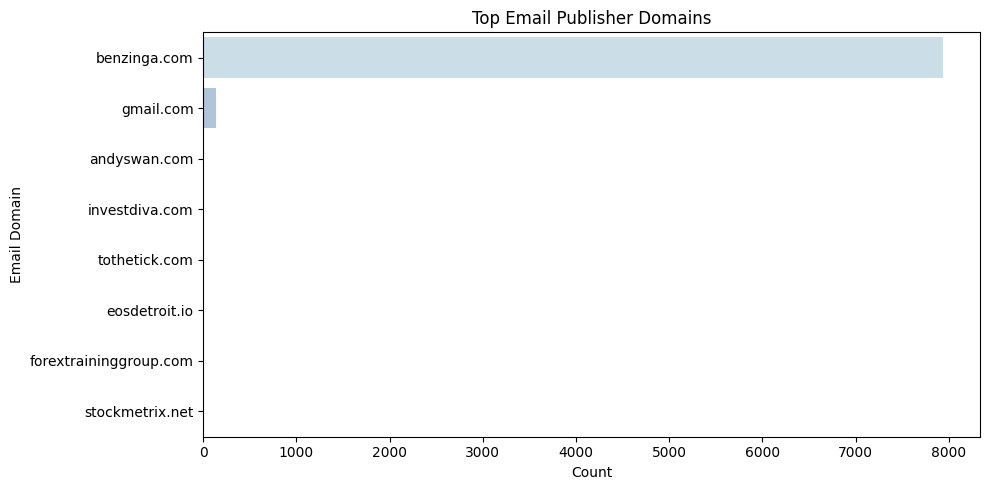

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# --- Prep: ensure date is cleaned ---
news_df['date'] = pd.to_datetime(
    news_df['date'], format='mixed', errors='coerce', utc=True)
news_df.dropna(subset=['date'], inplace=True)

# -------------------------------
# 1. Top Publishers + Examples
# -------------------------------
top_publishers = news_df['publisher'].value_counts().head(15)

print("\n📰 Top 15 Publishers:")
print(top_publishers)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_publishers.values, y=top_publishers.index, palette="crest")
plt.title("Top 15 News Publishers")
plt.xlabel("Article Count")
plt.ylabel("Publisher")
plt.tight_layout()
plt.show()

# Sample headlines from top 3 publishers
for pub in top_publishers.index[:3]:
    print(f"\n📌 Sample headlines from: {pub}")
    print(news_df[news_df['publisher'] == pub]
          ['headline'].dropna().sample(5, random_state=42).to_list())

# -------------------------------
# 2. Email-like Publisher Domains
# -------------------------------


def extract_domain(publisher):
    match = re.search(r'@([\w.-]+)', publisher)
    return match.group(1).lower() if match else None


# Apply to publishers that look like emails
email_publishers = news_df['publisher'].dropna().apply(
    lambda x: extract_domain(x)).dropna()
domain_counts = email_publishers.value_counts()

if not domain_counts.empty:
    print("\n📧 Top Publisher Domains from Emails:")
    print(domain_counts.head(10))

    # Plot
    plt.figure(figsize=(10, 5))
    sns.barplot(
        x=domain_counts.values[:10], y=domain_counts.index[:10], palette="ch:s=.25,rot=-.25")
    plt.title("Top Email Publisher Domains")
    plt.xlabel("Count")
    plt.ylabel("Email Domain")
    plt.tight_layout()
    plt.show()
else:
    print("\n✅ No email-style publishers detected.")

In [57]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import re

# Ensure directory exists
os.makedirs("plots/task1", exist_ok=True)

# Load your dataset
news_df = pd.read_csv("../data/raw_analyst_ratings.csv")
news_df['date'] = pd.to_datetime(
    news_df['date'], format='mixed', errors='coerce', utc=True)
news_df.dropna(subset=['date'], inplace=True)

# Preprocessing
news_df['headline_length'] = news_df['headline'].str.len()
news_df['date_only'] = news_df['date'].dt.date
news_df['hour'] = news_df['date'].dt.hour

# ---------- 1. Headline Length Distribution ----------
plt.figure(figsize=(10, 5))
sns.histplot(news_df['headline_length'], bins=50, kde=True)
plt.title("Headline Length Distribution")
plt.xlabel("Length (characters)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.savefig("plots/task1/headline_length_distribution.png")
plt.close()

# ---------- 2. Top Publishers ----------
top_publishers = news_df['publisher'].value_counts().head(15)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_publishers.values, y=top_publishers.index, palette="crest")
plt.title("Top 15 News Publishers")
plt.xlabel("Article Count")
plt.ylabel("Publisher")
plt.tight_layout()
plt.savefig("plots/task1/top_publishers.png")
plt.close()

# ---------- 3. Daily Publishing Frequency ----------
daily_counts = news_df.groupby('date_only').size()
daily_counts.index = pd.to_datetime(daily_counts.index)

plt.figure(figsize=(14, 6))
daily_counts.plot()
plt.title("Daily News Article Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Headlines")
plt.grid(True)
plt.tight_layout()
plt.savefig("plots/task1/daily_news_volume.png")
plt.close()

# ---------- 4. COVID Crash Window ----------
plt.figure(figsize=(14, 6))
daily_counts['2020-02-01':'2020-04-01'].plot(color='tomato', marker='o')
plt.title("News Volume During COVID Market Crash (Feb–Apr 2020)")
plt.xlabel("Date")
plt.ylabel("Number of Headlines")
plt.grid(True)
plt.tight_layout()
plt.savefig("plots/task1/covid_crash_volume.png")
plt.close()

# ---------- 5. Hour of Day Distribution ----------
hourly_counts = news_df['hour'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_counts.index, y=hourly_counts.values, palette="flare")
plt.title("Articles Released by Hour (UTC)")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Articles")
plt.tight_layout()
plt.savefig("plots/task1/hourly_distribution.png")
plt.close()

# ---------- 6. Topic Modeling: Unigrams + Bigrams ----------
sample_headlines = news_df['headline'].dropna().sample(
    n=10000, random_state=42)
vectorizer = CountVectorizer(
    stop_words='english', ngram_range=(1, 2), max_features=50)
X = vectorizer.fit_transform(sample_headlines)
word_counts = X.toarray().sum(axis=0)
feature_names = vectorizer.get_feature_names_out()
freq_series = pd.Series(
    word_counts, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=freq_series.values[:20],
            y=freq_series.index[:20], palette="coolwarm")
plt.title("Top 20 Keywords and Key Phrases")
plt.xlabel("Frequency")
plt.ylabel("Keyword / Phrase")
plt.tight_layout()
plt.savefig("plots/task1/topic_keywords.png")
plt.close()

/var/folders/cg/vq8tmr4540d4j652btyymbt40000gn/T/ipykernel_95345/1312373383.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_publishers.values, y=top_publishers.index, palette="crest")
/var/folders/cg/vq8tmr4540d4j652btyymbt40000gn/T/ipykernel_95345/1312373383.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_counts.index, y=hourly_counts.values, palette="flare")
/var/folders/cg/vq8tmr4540d4j652btyymbt40000gn/T/ipykernel_95345/1312373383.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freq_series.values[:20],
